# Lab 2: networkX Drawing and Network Properties

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
from networkx import nx

## TOC
1. [Q1](#Q1)
2. [Q2](#Q2)
3. [Q3](#Q3)
4. [Q4](#Q4)
5. [Assignment question](#Assignment_question)


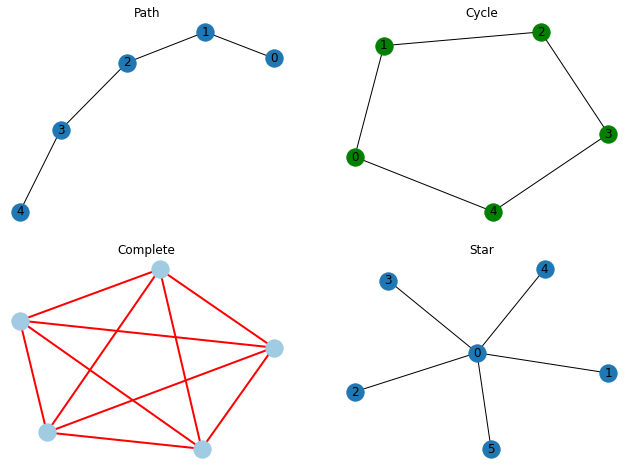

In [2]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 8))
ax = axes.flatten()
path = nx.path_graph(5)
nx.draw_networkx(path, with_labels=True, ax=ax[0])
ax[0].set_title('Path')
cycle = nx.cycle_graph(5)
nx.draw_networkx(cycle, node_color='green', with_labels=True, ax=ax[1])
ax[1].set_title('Cycle')
complete = nx.complete_graph(5)
nx.draw_networkx(complete, node_color='#A0CBE2', edge_color='red', width=2, with_labels=False, ax=ax[2])
ax[2].set_title('Complete')
star = nx.star_graph(5)
pos=nx.spring_layout(star)
nx.draw_networkx(star, pos, with_labels=True, ax=ax[3])
ax[3].set_title('Star')
for i in range(4): ax[i].set_axis_off()
plt.show()

### Q1:
*Use one sentence each to briefly describe the characteristics of each graph
type (its shape, edges, etc..)*

$V$ = a set of vertices, where $V \ni \{v_1, v_2, ... , v_n\}$

$E$ = a set of edges, where  $E \subseteq \{\{v_x,v_y\}\mid v_x,v_y\in V\}$

Let $G$ = ($V$, $E$) be an undirected graph

- **Path Graph**    := Suppose there are n vertices ($v_0, v_1, ... , v_n$) in $G$, such that $\forall e_{(v_x,v_y)} \in E $ | $0 \leq x \leq n-1$; $y = x + 1$ 
- **Cycle Graph**   := Suppose there are n vertices ($v_0, v_1, ... , v_n$) in $G$, such that $\forall e_{(v_x,v_y)} \in E $ | $0 \leq x \leq n; \{(0 \leq x \leq n-1) \Rightarrow (y = x + 1)\} \land \{(x = n) \Rightarrow (y = 1)\}$ 
- **Complete Graph**:= Suppose there are n vertices ($v_0, v_1, ... , v_n$) in $G$, such that $\forall e_{(v_x,v_y)} \in E $ | $x \neq y; 0 \leq x,y \leq n$
- **Star Graph**    := Suppose there are n vertices ($v_0, v_1, ... , v_n$) in $G$, such that $\forall e_{(v_x,v_y)} \in E $ | $x = 0; 1 \leq y \leq n$

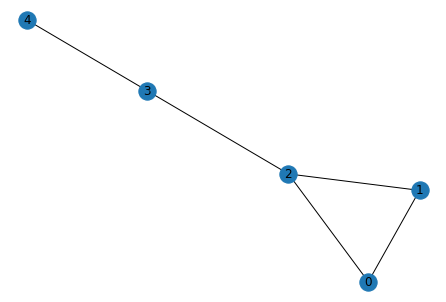

In [3]:
G = nx.lollipop_graph(3,2)
nx.draw(G, with_labels=True)
plt.show()

In [4]:
list(nx.connected_components(G))


[{0, 1, 2, 3, 4}]

In [5]:
nx.clustering(G)

{0: 1.0, 1: 1.0, 2: 0.3333333333333333, 3: 0, 4: 0}

### Q2: 
*How many connected components are there in the graph? What are they?*

There is only one connected component in the graph, it's all 5 vertices of the graph 

### Q3:
*Which nodes have the highest local clustering coefficient? Explain (from the
definition) why they have high clustering coefficient.*


Node 0 and 1 have the highest local clustering coefficient of 1, because the neighbor of these two nodes are each other and node 2, $(2*1\text{ between neighbor link})\div(2\text{ degrees}*(2-1)) = 1$

In [6]:
def netMeta(net):
    meta = {}
    meta["radius"]= nx.radius(net)
    meta["diameter"]= nx.diameter(net)
    meta["eccentricity"]= nx.eccentricity(net)
    meta["center"]= nx.center(net)
    meta["periphery"]= nx.periphery(net)
    meta["density"]= nx.density(net)
    return meta

In [7]:
netMeta(G)

{'radius': 2,
 'diameter': 3,
 'eccentricity': {0: 3, 1: 3, 2: 2, 3: 2, 4: 3},
 'center': [2, 3],
 'periphery': [0, 1, 4],
 'density': 0.5}

In [8]:
def netAna(net): 
    cols = ['Node name', "Betweenness centrality", "Degree centrality", "Closeness centrality", "Eigenvector centrality"]
    rows =[]
    print()
    a = nx.betweenness_centrality(net)
    b = nx.degree_centrality(net)
    c = nx.closeness_centrality(net)
    d = nx.eigenvector_centrality(net)
    for v in net.nodes(): 
        temp = []
        temp.append(v)
        temp.append(a[v])
        temp.append(b[v])
        temp.append(c[v])
        temp.append(d[v])
        rows.append(temp)
    df = pd.DataFrame(rows,columns=cols)
    df.set_index('Node name', inplace = True)
    return df

In [9]:
G_stat = netAna(G)
G_stat

,Betweenness centrality,Degree centrality,Closeness centrality,Eigenvector centrality
Node name,,,,
0,0.000000,0.50,0.571429,0.497153
1,0.000000,0.50,0.571429,0.497153
2,0.666667,0.75,0.800000,0.603704
3,0.500000,0.50,0.666667,0.342487
4,0.000000,0.25,0.444444,0.154671


In [10]:
G_stat.sort_values(by=['Eigenvector centrality'])

,Betweenness centrality,Degree centrality,Closeness centrality,Eigenvector centrality
Node name,,,,
4,0.000000,0.25,0.444444,0.154671
3,0.500000,0.50,0.666667,0.342487
0,0.000000,0.50,0.571429,0.497153
1,0.000000,0.50,0.571429,0.497153
2,0.666667,0.75,0.800000,0.603704


### Q4: 
*Which node(s) has the highest betweenness, degree, closeness, eigenvector
centrality? Explain using the definitions and graph structures.*

Node 2 has the highest betweenness, degree, closeness, and eigenvector centrality

Because node 2 has the most geodesics passing through, it has the highest degree of 3, it has the shortest average path length, and it has the most refferences by its neighbors  

In [11]:
pathlengths = []
print("source vertex {target:length, }")
for v in G.nodes():
    spl = dict(nx.single_source_shortest_path_length(G, v))
    print('{} {} '.format(v, spl))
    for p in spl:
        pathlengths.append(spl[p])
print('')
print("average shortest path length %s" % (sum(pathlengths) / len(pathlengths)))
dist = {}
for p in pathlengths:
    if p in dist: dist[p] += 1
    else: dist[p] = 1
print('')
print("length #paths")
verts = dist.keys()
for d in sorted(verts):
    print('%s %d' % (d, dist[d]))

source vertex {target:length, }
0 {0: 0, 1: 1, 2: 1, 3: 2, 4: 3} 
1 {1: 0, 0: 1, 2: 1, 3: 2, 4: 3} 
2 {2: 0, 0: 1, 1: 1, 3: 1, 4: 2} 
3 {3: 0, 2: 1, 4: 1, 0: 2, 1: 2} 
4 {4: 0, 3: 1, 2: 2, 0: 3, 1: 3} 

average shortest path length 1.36

length #paths
0 5
1 10
2 6
3 4


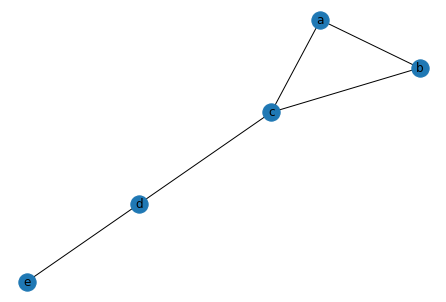

In [12]:
mapping = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e'}
H = nx.relabel_nodes(G, mapping)
nx.draw(H, with_labels=True)
plt.show()

### Assignment question: 
*use the kite graph example in lecture 2 slides page 11-13 to
calculate the network properties.*

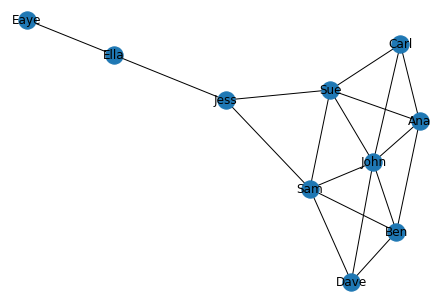

In [13]:
net = nx.krackhardt_kite_graph()
namemap = {0: 'Ana', 1: 'Ben', 2: 'Carl', 3: 'John', 4: 'Dave', 5:'Sue', 6:'Sam',7:'Jess',8:'Ella',9:'Eaye'}
net = nx.relabel_nodes(net, namemap)
nx.draw(net, with_labels=True)
plt.show()

In [14]:
list(nx.connected_components(net))

[{'Ana', 'Ben', 'Carl', 'Dave', 'Eaye', 'Ella', 'Jess', 'John', 'Sam', 'Sue'}]

In [15]:
nx.clustering(net)

{'Ana': 0.6666666666666666,
 'Ben': 0.6666666666666666,
 'Carl': 1.0,
 'John': 0.5333333333333333,
 'Dave': 1.0,
 'Sue': 0.5,
 'Sam': 0.5,
 'Jess': 0.3333333333333333,
 'Ella': 0,
 'Eaye': 0}

In [16]:
netMeta(net)

{'radius': 2,
 'diameter': 4,
 'eccentricity': {'Ana': 4,
  'Ben': 4,
  'Carl': 4,
  'John': 4,
  'Dave': 4,
  'Sue': 3,
  'Sam': 3,
  'Jess': 2,
  'Ella': 3,
  'Eaye': 4},
 'center': ['Jess'],
 'periphery': ['Ana', 'Ben', 'Carl', 'John', 'Dave', 'Eaye'],
 'density': 0.4}

In [17]:
net_stat = netAna(net)
net_stat

,Betweenness centrality,Degree centrality,Closeness centrality,Eigenvector centrality
Node name,,,,
Ana,0.023148,0.444444,0.529412,0.352209
Ben,0.023148,0.444444,0.529412,0.352209
Carl,0.000000,0.333333,0.500000,0.285835
John,0.101852,0.666667,0.600000,0.481020
Dave,0.000000,0.333333,0.500000,0.285835
Sue,0.231481,0.555556,0.642857,0.397691
Sam,0.231481,0.555556,0.642857,0.397691
Jess,0.388889,0.333333,0.600000,0.195862
Ella,0.222222,0.222222,0.428571,0.048075


In [18]:
net_stat.sort_values(by=['Eigenvector centrality'])

,Betweenness centrality,Degree centrality,Closeness centrality,Eigenvector centrality
Node name,,,,
Eaye,0.000000,0.111111,0.310345,0.011164
Ella,0.222222,0.222222,0.428571,0.048075
Jess,0.388889,0.333333,0.600000,0.195862
Carl,0.000000,0.333333,0.500000,0.285835
Dave,0.000000,0.333333,0.500000,0.285835
Ana,0.023148,0.444444,0.529412,0.352209
Ben,0.023148,0.444444,0.529412,0.352209
Sue,0.231481,0.555556,0.642857,0.397691
Sam,0.231481,0.555556,0.642857,0.397691


In [19]:
for name in net.nodes(): 
    print(f'{name}: {net_stat.loc[name, "Betweenness centrality"]:5.3f}')

Ana: 0.023
Ben: 0.023
Carl: 0.000
John: 0.102
Dave: 0.000
Sue: 0.231
Sam: 0.231
Jess: 0.389
Ella: 0.222
Eaye: 0.000
